In [1]:
pip uninstall dlib 

Found existing installation: dlib 19.18.0
Uninstalling dlib-19.18.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/dlib-19.18.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/dlib.cpython-37m-x86_64-linux-gnu.so
Proceed (y/n)? y
  Successfully uninstalled dlib-19.18.0


In [2]:
!git clone https://github.com/davisking/dlib.git

Cloning into 'dlib'...
remote: Enumerating objects: 49431, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (157/157), done.
y
remote: Total 49431 (delta 123), reused 191 (delta 94), pack-reused 49180
Receiving objects: 100% (49431/49431), 24.66 MiB | 12.44 MiB/s, done.
Resolving deltas: 100% (34735/34735), done.


In [3]:
cd dlib

/content/dlib


In [5]:
!mkdir build

mkdir: cannot create directory ‘build’: File exists


In [6]:
cd build

/content/dlib/build


In [7]:
!cmake .. -DDLIB_USE_CUDA=0 -DUSE_AVX_INSTRUCTIONS=1

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Using CMake version: 3.12.0
-- Compiling dlib version: 19.22.99
-- Enabling AVX instructions
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - 

In [8]:
!cmake --build .

Scanning dependencies of target dlib
[  1%] Building CXX object dlib/CMakeFiles/dlib.dir/base64/base64_kernel_1.cpp.o
[  3%] Building CXX object dlib/CMakeFiles/dlib.dir/bigint/bigint_kernel_1.cpp.o
[  5%] Building CXX object dlib/CMakeFiles/dlib.dir/bigint/bigint_kernel_2.cpp.o
[  6%] Building CXX object dlib/CMakeFiles/dlib.dir/bit_stream/bit_stream_kernel_1.cpp.o
[  8%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_decoder/entropy_decoder_kernel_1.cpp.o
[ 10%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_decoder/entropy_decoder_kernel_2.cpp.o
[ 11%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_encoder/entropy_encoder_kernel_1.cpp.o
[ 13%] Building CXX object dlib/CMakeFiles/dlib.dir/entropy_encoder/entropy_encoder_kernel_2.cpp.o
[ 15%] Building CXX object dlib/CMakeFiles/dlib.dir/md5/md5_kernel_1.cpp.o
[ 16%] Building CXX object dlib/CMakeFiles/dlib.dir/tokenizer/tokenizer_kernel_1.cpp.o
[ 18%] Building CXX object dlib/CMakeFiles/dlib.dir/unicode/unicode.cpp.o

In [9]:
cd ..

/content/dlib


In [10]:
!ls

build		dlib  examples		 LICENSE.txt  python_examples  setup.py
CMakeLists.txt	docs  ISSUE_TEMPLATE.md  MANIFEST.in  README.md        tools


In [11]:
!python setup.py install --no DLIB_USE_CUDA

running install
running bdist_egg
running egg_info
creating tools/python/dlib.egg-info
writing tools/python/dlib.egg-info/PKG-INFO
writing dependency_links to tools/python/dlib.egg-info/dependency_links.txt
writing top-level names to tools/python/dlib.egg-info/top_level.txt
writing manifest file 'tools/python/dlib.egg-info/SOURCES.txt'
package init file 'tools/python/dlib/__init__.py' not found (or not a regular file)
reading manifest template 'MANIFEST.in'
no previously-included directories found matching 'tools/python/build*'
no previously-included directories found matching 'dlib/cmake_utils/*/build*'
adding license file 'LICENSE.txt'
writing manifest file 'tools/python/dlib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
Building extension for Python 3.7.12 (default, Sep 10 2021, 00:21:48) 
Invoking CMake setup: 'cmake /content/dlib/tools/python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=/content/dlib/build/

**Теперь нужно перезапустить среду выполнения!!!**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import dlib
from skimage import io
from scipy.spatial import distance

In [6]:
dlib.DLIB_USE_CUDA

False

In [7]:
sp = dlib.shape_predictor('/content/drive/My Drive/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('/content/drive/My Drive/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

RuntimeError: ignored

In [8]:
dlib.__version__

'19.22.99'

In [19]:
img     = io.imread('/content/drive/My Drive/1.jpg')
img_src = io.imread('/content/drive/My Drive/1.jpg')


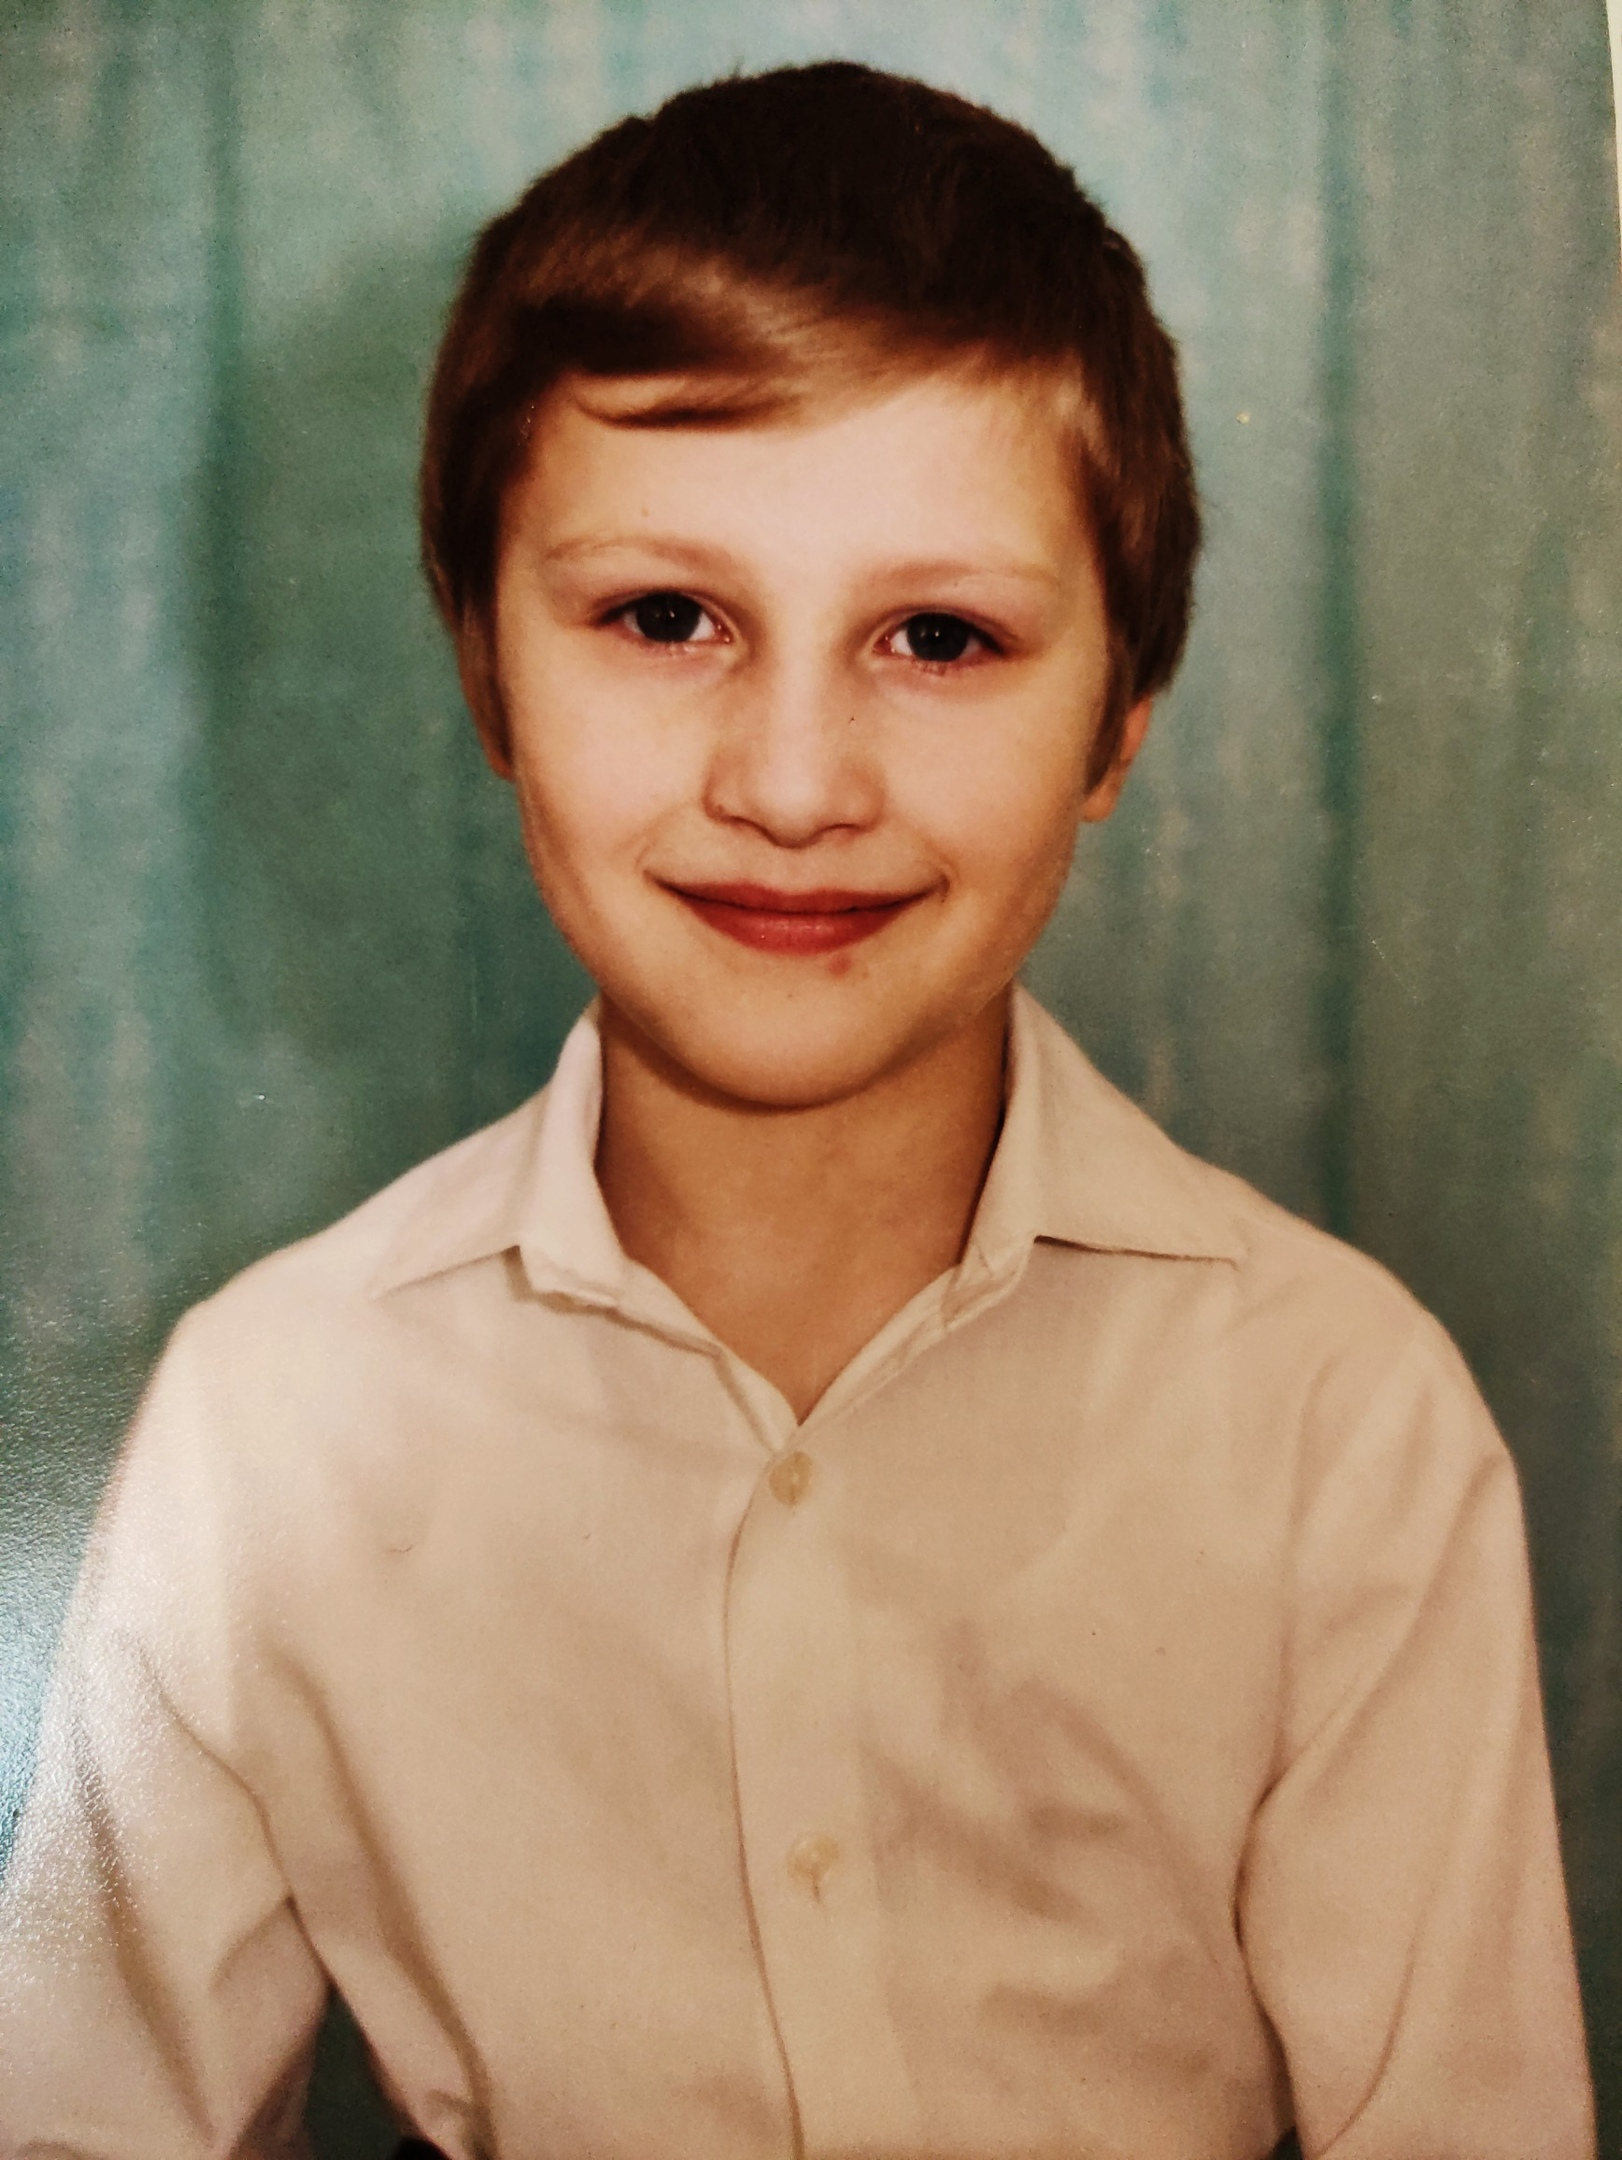

In [18]:
from IPython.display import Image
Image('/content/drive/My Drive/1.jpg')

In [34]:
dets = detector(img_src, 1)

NameError: ignored

In [21]:
dets[0].left()

NameError: ignored

In [32]:
for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape = sp(img_src, d)    

NameError: ignored

In [31]:
shape

NameError: ignored

In [24]:
import cv2

In [25]:
import numpy as np
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

In [35]:
from google.colab.patches import cv2_imshow
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.rectangle(img, (dets[0].left(), dets[0].top()), (dets[0].right(), dets[0].bottom()), (0, 255, 0, 255), 2)

shapex = shape_to_np(shape)

for (x, y) in shapex:
		cv2.circle(img, (x, y), 3, (0, 0, 255), -1)

cv2_imshow(img)

NameError: ignored

In [36]:
face_descriptor1 = facerec.compute_face_descriptor(img_src, shape)

NameError: ignored

In [37]:
face_descriptor1

NameError: ignored

In [29]:
img_2     = io.imread('/content/drive/My Drive/2.jpg')
img_src_2 = io.imread('/content/drive/My Drive/2.jpg')

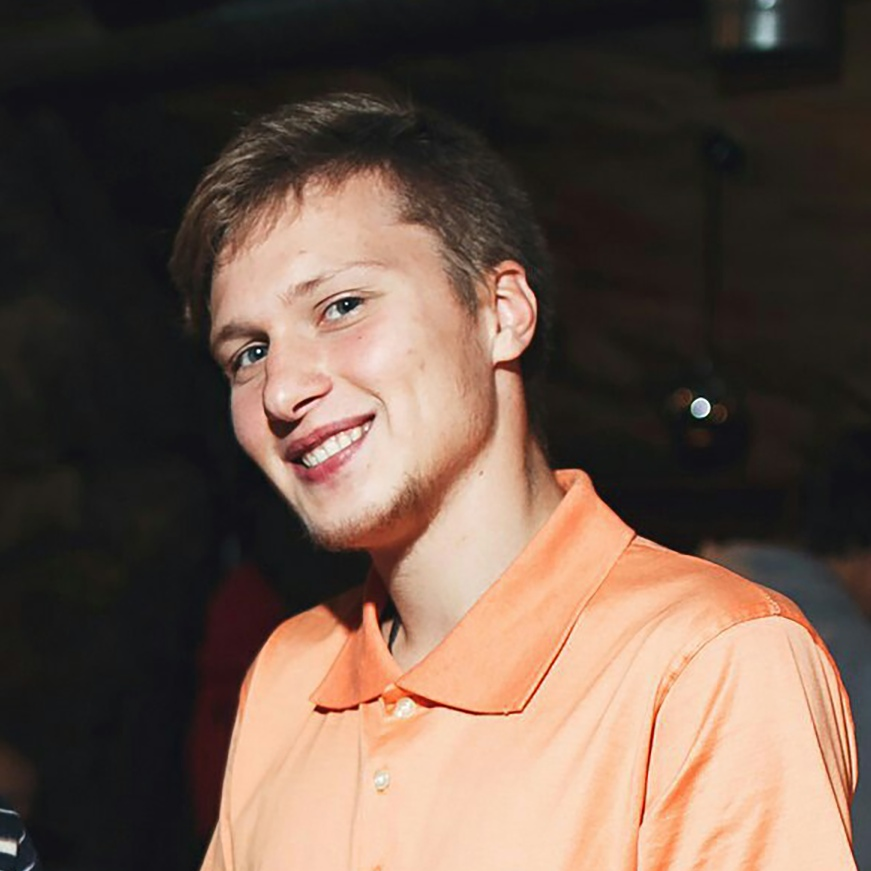

In [30]:
from IPython.display import Image
Image('/content/drive/My Drive/2.jpg')

In [38]:
dets_2 = detector(img_src_2, 1)

NameError: ignored

In [39]:
for k, d in enumerate(dets_2):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape_2 = sp(img_src_2, d)  

NameError: ignored

In [40]:
cv2.rectangle(img_2, (dets_2[0].left(), dets_2[0].top()), (dets_2[0].right(), dets_2[0].bottom()), (0, 255, 0, 255), 2)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_RGB2BGR)
cv2_imshow(img_2)

NameError: ignored

In [41]:
face_descriptor2 = facerec.compute_face_descriptor(img_src_2, shape_2)

NameError: ignored

In [42]:
a = distance.euclidean(face_descriptor1, face_descriptor2)
print(a)

NameError: ignored

In [43]:
img_b     = io.imread('/content/drive/My Drive/3.jpg')
img_src_b = io.imread('/content/drive/My Drive/3.jpg')

FileNotFoundError: ignored

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/3.jpg')

In [6]:
dets_b = detector(img_src_b, 1)

NameError: ignored

In [7]:
for k, d in enumerate(dets_b):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    
shape_b = sp(img_src_b, d)  

NameError: ignored

In [10]:
cv2.rectangle(img_b, (dets_b[0].left(), dets_b[0].top()), (dets_b[0].right(), dets_b[0].bottom()), (0, 255, 0, 255), 2)
img_b = cv2.cvtColor(img_b, cv2.COLOR_RGB2BGR)
cv2_imshow(img_b)

NameError: ignored

In [11]:
face_descriptorb = facerec.compute_face_descriptor(img_src_b, shape_b)

NameError: ignored

In [12]:
a = distance.euclidean(face_descriptor1, face_descriptorb)
print(a)

NameError: ignored

In [13]:
a = distance.euclidean(face_descriptor2, face_descriptorb)
print(a)

NameError: ignored